<a href="https://colab.research.google.com/github/DuchessDiamond/MIT_Supervised_Classification_Example/blob/main/HeatherDiamond_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks Project: Street View Housing Number Digit Recognition**

# **Marks: 30**

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a CNN model that can recognize the digits in the images.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, MaxPool2D,Flatten, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [ ]:
import os
working_directory = os.getcwd()
print(working_directory)
import h5py
# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File(r'C:\Users\Administrator\Downloads\archive\SVHN_single_grey1.h5', 'r')
# Load the training and the test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test  = h5f['X_test'][:]
y_test  = h5f['y_test'][:]
X_val   = h5f['X_val'][:]
y_val   = h5f['y_val'][:]

print(h5f.keys())
# Close this file
h5f.close()

C:\Users\Administrator\Desktop\Varsity\me\timeseries_anomaly
<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


### **Question 1: Complete the below code to visualize the first 10 images in the dataset. (1 Mark)**

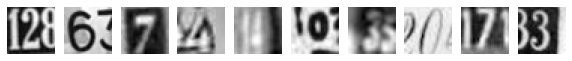

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap = "gray")  # Write the function to visualize images
    plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1) # Batch count, x,y, chaneel
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [ ]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **Question 2: One-hot encode the labels in the target variable y_train and y_test. (2 Marks)**

In [ ]:
# Write the function and appropriate variable name to one-hot encode the output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
# test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Question 3: Build and train a CNN model as per the above mentioned architecture. (10 Marks)**

In [ ]:
# Define the model

def cnn_model_1():
    model = Sequential() 
    # Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1))) # Total of 16 filters size 3x3
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Build the model
model_1 = cnn_model_1()

NameError: ignored

In [ ]:
#Print the model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size = 32, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 45s 42ms/step - loss: 1.1748 - accuracy: 0.6104 - val_loss: 0.6555 - val_accuracy: 0.8074
Epoch 2/20
1050/1050 [==============================] - 50s 48ms/step - loss: 0.5451 - accuracy: 0.8433 - val_loss: 0.5337 - val_accuracy: 0.8469
Epoch 3/20
1050/1050 [==============================] - 51s 49ms/step - loss: 0.4625 - accuracy: 0.8663 - val_loss: 0.5145 - val_accuracy: 0.8520
Epoch 4/20
1050/1050 [==============================] - 49s 47ms/step - loss: 0.4041 - accuracy: 0.8826 - val_loss: 0.4483 - val_accuracy: 0.8737
Epoch 5/20
1050/1050 [==============================] - 79s 75ms/step - loss: 0.3607 - accuracy: 0.8917 - val_loss: 0.4796 - val_accuracy: 0.8704
Epoch 6/20
1050/1050 [==============================] - 80s 76ms/step - loss: 0.3205 - accuracy: 0.9044 - val_loss: 0.4639 - val_accuracy: 0.8724
Epoch 7/20
1050/1050 [==============================] - 68s 65ms/step - loss: 0.2913 - accuracy: 0.9114 - val_loss: 0.4461 -

### **Plotting the validation and training accuracies**


### **Question 4: Write your observations on the below plot. (2 Marks)**

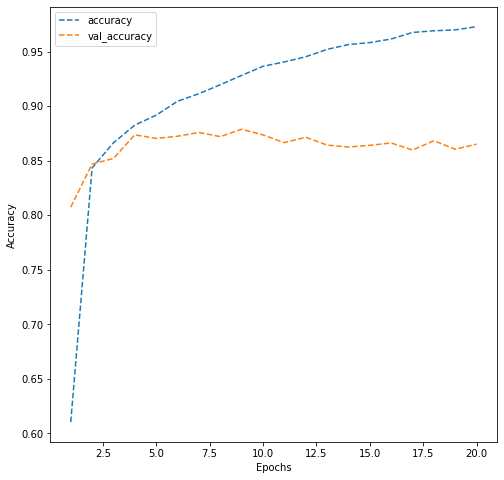

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Question 5: Build and train the second CNN model as per the above mentioned architecture. (10 Marks)**

In [ ]:
# Define the model
def cnn_model_2():
    model = Sequential()
    # Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
   
    return model

In [ ]:
# Build the model
model_2 = cnn_model_2()

In [ ]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [ ]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size = 128, verbose=1)

Epoch 1/30
263/263 [==============================] - 72s 253ms/step - loss: 1.4669 - accuracy: 0.4996 - val_loss: 2.8085 - val_accuracy: 0.1260
Epoch 2/30
263/263 [==============================] - 54s 206ms/step - loss: 0.6987 - accuracy: 0.7816 - val_loss: 0.6935 - val_accuracy: 0.7879
Epoch 3/30
263/263 [==============================] - 56s 215ms/step - loss: 0.5615 - accuracy: 0.8261 - val_loss: 0.4889 - val_accuracy: 0.8632
Epoch 4/30
263/263 [==============================] - 58s 222ms/step - loss: 0.4999 - accuracy: 0.8481 - val_loss: 0.4902 - val_accuracy: 0.8552
Epoch 5/30
263/263 [==============================] - 62s 236ms/step - loss: 0.4481 - accuracy: 0.8630 - val_loss: 0.4001 - val_accuracy: 0.8902
Epoch 6/30
263/263 [==============================] - 58s 220ms/step - loss: 0.4163 - accuracy: 0.8725 - val_loss: 0.4134 - val_accuracy: 0.8826
Epoch 7/30
263/263 [==============================] - 56s 212ms/step - loss: 0.3846 - accuracy: 0.8824 - val_loss: 0.4299 - val_ac

### **Plotting the validation and training accuracies**


### **Question 6: Write your observations on the below plot. (2 Marks)**

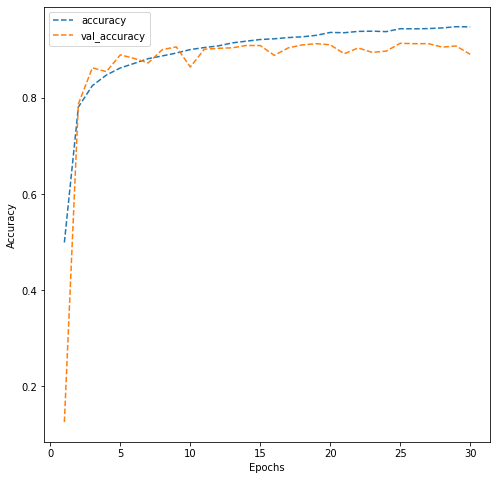

In [ ]:
# Plotting the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1, 31)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Question 7: Make predictions on the test data using the second model. (1 Mark)** 

In [ ]:
# Make prediction on the test data using model_2 

test_pred =model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 10s 15ms/step


In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

### **Question 8: Write your final observations on the performance of the model on the test data. (2 Marks)**

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1814
           1       0.94      0.82      0.87      1828
           2       0.93      0.90      0.91      1803
           3       0.85      0.87      0.86      1719
           4       0.90      0.89      0.90      1812
           5       0.92      0.88      0.90      1768
           6       0.84      0.90      0.87      1832
           7       0.83      0.95      0.89      1808
           8       0.91      0.85      0.88      1812
           9       0.89      0.89      0.89      1804

    accuracy                           0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000



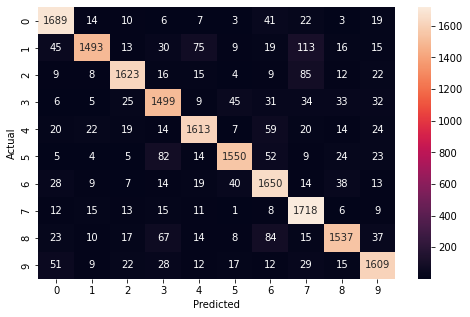

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Observations:**
The accuracy of 90% on the test data which is comparable to the accuracy of the validation data, implies that the model is giving a generalized performance. <br>
The high recall range (85-95)% implies that the model is good at identifying most of the objects. Model is able to identify about 94% of image 1 but can only identify only ~84% of image 7 and 6.<br>
Here also lowest image classes 1 and 7 has the lowesta acuracy which means the model needs improvements in order to distinguish between 1 and 7.<br>
Overall the model could distiguish individual digits well.<br>
Also, considering the overall accuracy and recall values, we can say that CNN works better than ANN when identifying digits in the images.<br>